In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
plt.style.use(['classic'])

In [2]:
# Read in Revenue Files
file_2006 = "../../datasets/subsets/supp_ex/supp_ex_2006.csv"

supp_2006 = pd.read_csv(file_2006)
supp_2006 = supp_2006.set_index(['STNAME'])
supp_2006

,2006_E212,2006_E213,2006_E214,2006_E215,2006_E216,2006_E217,2006_E218,2006_E222,2006_E223,2006_E224,...,2006_E256,2006_E257,2006_E258,2006_E262,2006_E263,2006_E264,2006_E265,2006_E266,2006_E267,2006_E268
STNAME,,,,,,,,,,,,,,,,,,,,,
alabama,170933354,159719812,64853947,241821448,149774596,121849909,52587518,59536612,52488754,18518498,...,4694889,40467214,1125513,2498454.0,2999791.0,48921507.0,1443728.0,60893.0,51904.0,1847184.0
alaska,59312386,42691284,10380525,60529665,63211936,5442576,28589081,23935300,16381460,4355269,...,2015180,510074,964450,1044730.0,583019.0,1422603.0,169697.0,50422.0,89339.0,NaN
arizona,279269396,117199517,52085805,260069781,255072799,134602626,132643115,67946540,28399745,13168238,...,34614661,45190879,18364142,2570996.0,613269.0,8183952.0,2086690.0,24897935.0,2586995.0,19691710.0
arkansas,118655299,141483083,60719930,157962962,117603294,70189530,49761951,29422498,33317607,17068318,...,10932165,19790968,7792420,329359.0,3115791.0,12941642.0,370148.0,1903750.0,624304.0,3105392.0
california,1684068985,2049972094,240074615,2518366818,2048972809,512680186,1203752431,531731963,650044906,94581339,...,45394353,47452761,34304156,278137.0,2276644.0,9656287.0,1405979.0,181540.0,85693.0,5684481.0
colorado,204937662,208914194,42364521,309060835,237435459,112835479,144713931,46408849,46576312,9125679,...,14940487,23181028,40082021,449248.0,2884644.0,3844416.0,2542093.0,163005.0,97882.0,8614956.0
connecticut,306128211,137283895,73252820,293988633,255675257,22304000,84499822,107040376,47558960,30626452,...,27968100,1956726,4829160,1681752.0,2520966.0,4598586.0,1623499.0,2763629.0,313285.0,5166193.0
delaware,42165566,11228135,7991579,51300458,45754353,16542988,37684197,18112579,4755518,3390456,...,1949704,1066923,54317,NaN,NaN,NaN,NaN,NaN,NaN,2742621.0
district of columbia,48637112,35207502,12294616,48015949,47201152,48228656,16434736,6125723,5439012,1881654,...,1096307,6082782,2770061,NaN,105.0,NaN,NaN,4407.0,NaN,2014136.0


In [3]:
(supp_2006.sum(axis=1)/1000000000).sort_values(ascending = False).head(5)

STNAME
california    19.338147
texas         12.186003
new york      11.993945
new jersey     7.947072
florida        7.658565
dtype: float64

In [20]:
summary_2006 = pd.DataFrame(supp_2006.sum(axis=1)/100000000, columns=['Total SupportEx ($100M)'])
summary_2006['Salaries SupportEx ($100M)'] = supp_2006.iloc[:,0:7].sum(axis=1)/100000000
summary_2006['Benefits SupportEx ($100M)'] = supp_2006.iloc[:,7:14].sum(axis=1)/100000000
summary_2006['Services SupportEx ($100M)'] = supp_2006.iloc[:,14:21].sum(axis=1)/100000000
summary_2006['Supplies SupportEx ($100M)'] = supp_2006.iloc[:,21:28].sum(axis=1)/100000000
summary_2006['Property SupportEx ($100M)'] = supp_2006.iloc[:,28:35].sum(axis=1)/100000000
summary_2006['Other SupportEx ($100M)'] = supp_2006.iloc[:,35:42].sum(axis=1)/100000000
summary_2006

,Total SupportEx ($100M),Salaries SupportEx ($100M),Benefits SupportEx ($100M),Services SupportEx ($100M),Supplies SupportEx ($100M),Property SupportEx ($100M),Other SupportEx ($100M)
STNAME,,,,,,,
alabama,20.353558,9.615406,3.856327,2.449379,3.375662,0.478550,0.578235
alaska,6.108377,2.701575,1.156412,1.309703,0.844716,0.062374,0.033598
arizona,25.073000,12.309430,3.336796,4.448100,3.094042,1.278315,0.606315
arkansas,13.660089,7.163760,1.828083,2.012619,1.956243,0.475480,0.223904
california,193.381468,102.578879,36.460526,31.040432,21.268759,1.837184,0.195688
colorado,26.682884,12.602621,2.956830,7.321582,2.711752,0.904137,0.185962
connecticut,25.376462,11.731326,4.292313,6.546531,2.126701,0.492912,0.186679
delaware,4.954552,2.126673,0.930259,1.649453,0.179117,0.041624,0.027426
district of columbia,4.989744,2.560197,0.432171,1.160470,0.629978,0.186742,0.020186


In [25]:
summary_pct = pd.DataFrame(summary_2006['Salaries SupportEx ($100M)'] / summary_2006['Total SupportEx ($100M)'] *100, columns = ['Salaries (%)'])
summary_pct['Benefits (%)'] = summary_2006['Benefits SupportEx ($100M)'] / summary_2006['Total SupportEx ($100M)'] *100
summary_pct['Services (%)'] = summary_2006['Services SupportEx ($100M)'] / summary_2006['Total SupportEx ($100M)'] *100
summary_pct['Supplies (%)'] = summary_2006['Supplies SupportEx ($100M)'] / summary_2006['Total SupportEx ($100M)'] *100
summary_pct['Property (%)'] = summary_2006['Property SupportEx ($100M)'] / summary_2006['Total SupportEx ($100M)'] *100
summary_pct['Other (%)'] = summary_2006['Other SupportEx ($100M)'] / summary_2006['Total SupportEx ($100M)'] *100
summary_pct

,Salaries (%),Benefits (%),Services (%),Supplies (%),Property (%),Other (%)
STNAME,,,,,,
alabama,47.241891,18.946698,12.034155,16.585119,2.351186,2.840951
alaska,44.227371,18.931571,21.441089,13.828806,1.021130,0.550033
arizona,49.094367,13.308326,17.740600,12.340136,5.098371,2.418201
arkansas,52.442999,13.382654,14.733570,14.320868,3.480799,1.639110
california,53.044834,18.854198,16.051399,10.998344,0.950031,0.101193
colorado,47.231104,11.081375,27.439246,10.162887,3.388452,0.696935
connecticut,46.229164,16.914545,25.797651,8.380605,1.942397,0.735639
delaware,42.923612,18.775842,33.291670,3.615198,0.840122,0.553556
district of columbia,51.309188,8.661184,23.257103,12.625449,3.742516,0.404559


In [26]:
# Load in Dropout Rates
dropout_path = "../../datasets/subsets/success/success_df_2006.csv"

success_2006 = pd.read_csv(dropout_path)
success_2006

,STNAME,2006_DRP912,2006_DRP9,2006_DRP10,2006_DRP11,2006_DRP12,2006_DRPAM,2006_DRPAS,2006_DRPHI,2006_DRPBL,2006_DRPWH
0,alabama,2.5,1.9,2.6,2.8,2.9,1.3,1.2,2.9,2.9,2.3
1,alaska,8.0,4.8,7.5,8.9,11.3,11.7,6.9,9.7,10.0,6.2
2,arizona,7.6,4.9,6.0,8.0,13.0,NaN,4.4,9.3,8.1,NaN
3,arkansas,3.1,1.8,3.0,4.1,3.9,2.5,2.4,3.8,4.2,2.7
4,california,3.7,2.3,2.3,3.0,8.1,4.4,1.8,4.8,6.5,2.3
5,colorado,7.8,5.7,7.4,8.5,10.1,13.5,4.8,15.8,12.5,4.7
6,connecticut,2.0,1.9,1.9,2.3,1.9,2.3,0.7,4.6,2.8,1.3
7,delaware,5.5,6.5,5.7,5.3,4.0,6.8,2.9,9.8,7.3,4.2
8,district of columbia,NaN,NaN,NaN,NaN,NaN,NaN,7.4,NaN,NaN,4.0
9,florida,4.1,3.7,3.7,4.2,4.9,3.7,1.7,5.0,5.8,2.9


In [27]:
summary_pct['Dropout Rate'] = ''

for i in range(len(success_2006)):
    summary_pct['Dropout Rate'][i] = success_2006['2006_DRP912'][i].astype(float)
    
summary_pct

C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Salaries (%),Benefits (%),Services (%),Supplies (%),Property (%),Other (%),Dropout Rate
STNAME,,,,,,,
alabama,47.241891,18.946698,12.034155,16.585119,2.351186,2.840951,2.5
alaska,44.227371,18.931571,21.441089,13.828806,1.021130,0.550033,8
arizona,49.094367,13.308326,17.740600,12.340136,5.098371,2.418201,7.6
arkansas,52.442999,13.382654,14.733570,14.320868,3.480799,1.639110,3.1
california,53.044834,18.854198,16.051399,10.998344,0.950031,0.101193,3.7
colorado,47.231104,11.081375,27.439246,10.162887,3.388452,0.696935,7.8
connecticut,46.229164,16.914545,25.797651,8.380605,1.942397,0.735639,2
delaware,42.923612,18.775842,33.291670,3.615198,0.840122,0.553556,5.5
district of columbia,51.309188,8.661184,23.257103,12.625449,3.742516,0.404559,NaN


In [28]:
summary_pct.sort_values(by=['Dropout Rate'], ascending = False)

,Salaries (%),Benefits (%),Services (%),Supplies (%),Property (%),Other (%),Dropout Rate
STNAME,,,,,,,
louisiana,44.607667,17.361117,23.045321,10.863084,2.618249,1.504561,8.4
alaska,44.227371,18.931571,21.441089,13.828806,1.021130,0.550033,8
colorado,47.231104,11.081375,27.439246,10.162887,3.388452,0.696935,7.8
nevada,53.696413,17.834013,12.103373,11.312438,3.764228,1.289535,7.7
arizona,49.094367,13.308326,17.740600,12.340136,5.098371,2.418201,7.6
wyoming,48.582711,18.029126,11.294853,15.133388,6.336736,0.623186,5.7
washington,55.777986,16.798537,19.242676,5.594786,2.207605,0.378409,5.6
delaware,42.923612,18.775842,33.291670,3.615198,0.840122,0.553556,5.5
new mexico,48.628007,14.278616,23.653992,10.265495,1.122669,2.051221,5.5


In [29]:
summary_2006['Dropout Rate'] = ''

for i in range(len(success_2006)):
    summary_2006['Dropout Rate'][i] = success_2006['2006_DRP912'][i].astype(float)
    

summary_2006 = summary_2006[summary_2006['Dropout Rate'].notna()]
summary_2006['Dropout Rate'] = summary_2006['Dropout Rate'].astype(float)
summary_2006.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, alabama to wyoming
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Total SupportEx ($100M)     47 non-null     float64
 1   Salaries SupportEx ($100M)  47 non-null     float64
 2   Benefits SupportEx ($100M)  47 non-null     float64
 3   Services SupportEx ($100M)  47 non-null     float64
 4   Supplies SupportEx ($100M)  47 non-null     float64
 5   Property SupportEx ($100M)  47 non-null     float64
 6   Other SupportEx ($100M)     47 non-null     float64
 7   Dropout Rate                47 non-null     float64
dtypes: float64(8)
memory usage: 3.3+ KB


C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


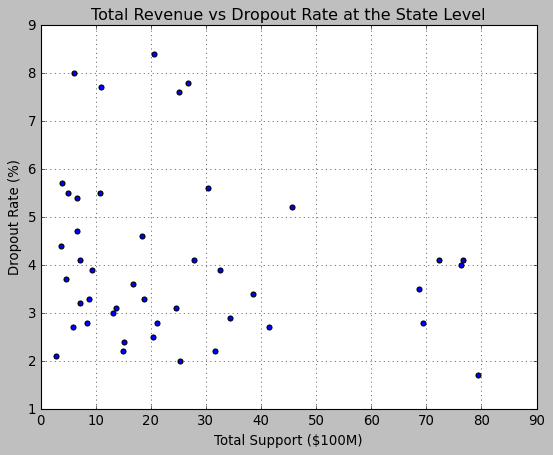

In [32]:
# Total Revenue and Dropout Rate
plt.scatter(summary_2006['Total SupportEx ($100M)'], summary_2006['Dropout Rate'])
plt.xlabel('Total Support ($100M)')
plt.xlim(left = 0, right = 90)
plt.ylabel('Dropout Rate (%)')
plt.title("Total Revenue vs Dropout Rate at the State Level")
plt.grid()

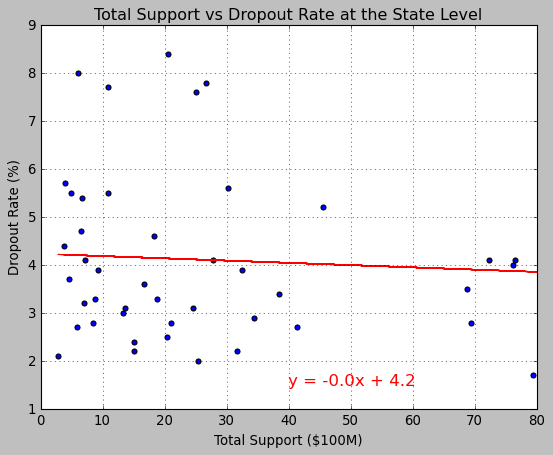

The correlation between both factors is -0.1059


In [34]:
# Total Support vs Dropout Rate
x_values = summary_2006['Total SupportEx ($100M)']
y_values = summary_2006['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")
plt.xlabel('Total Support ($100M)')
plt.ylabel('Dropout Rate (%)')
plt.title('Total Support vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 80)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

In [35]:
summary_pct['Dropout Rate'] = ''

for i in range(len(success_2006)):
    summary_pct['Dropout Rate'][i] = success_2006['2006_DRP912'][i].astype(float)
    

summary_pct = summary_pct[summary_pct['Dropout Rate'].notna()]
summary_pct['Dropout Rate'] = summary_pct['Dropout Rate'].astype(float)
summary_pct.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, alabama to wyoming
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Salaries (%)  47 non-null     float64
 1   Benefits (%)  47 non-null     float64
 2   Services (%)  47 non-null     float64
 3   Supplies (%)  47 non-null     float64
 4   Property (%)  47 non-null     float64
 5   Other (%)     47 non-null     float64
 6   Dropout Rate  47 non-null     float64
dtypes: float64(7)
memory usage: 2.9+ KB


C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


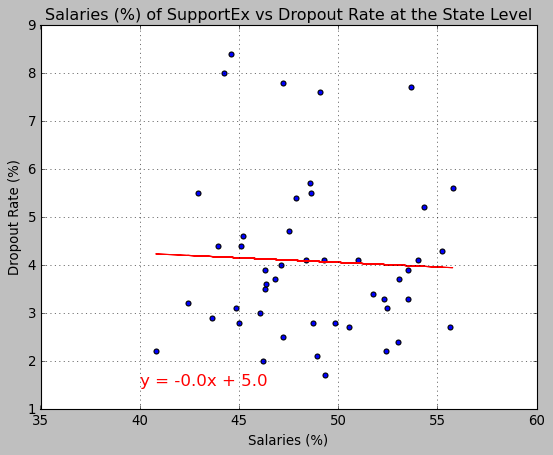

The correlation between both factors is -0.0442


In [37]:
# Salaries (%) vs Dropout Rate
x_values = summary_pct['Salaries (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")
plt.xlabel('Salaries (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Salaries (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 35, right = 60)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

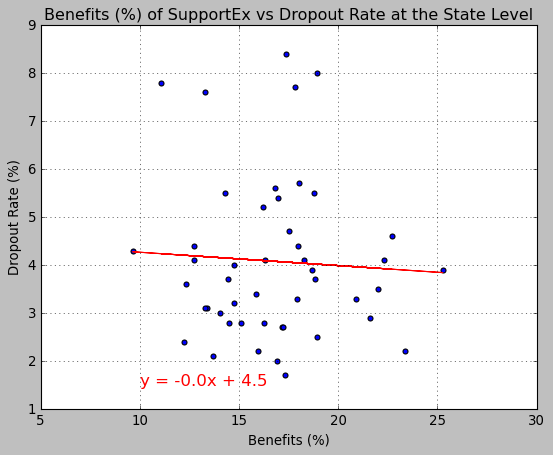

The correlation between both factors is -0.0558


In [41]:
# Benefits (%) vs Dropout Rate
x_values = summary_pct['Benefits (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,1.5),fontsize=15,color="red")
plt.xlabel('Benefits (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Benefits (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 5, right = 30)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

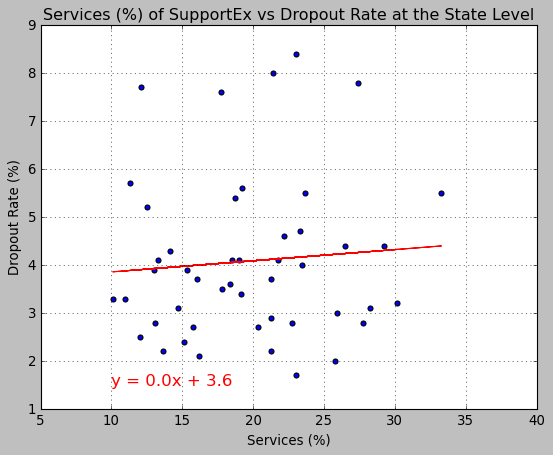

The correlation between both factors is 0.0799


In [44]:
# Services (%) vs Dropout Rate
x_values = summary_pct['Services (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,1.5),fontsize=15,color="red")
plt.xlabel('Services (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Services (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 5, right = 40)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

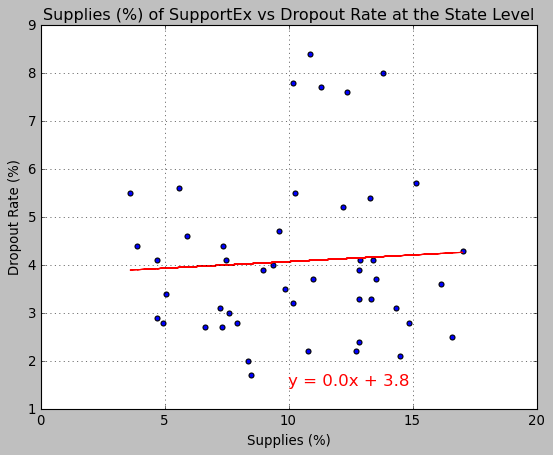

The correlation between both factors is 0.0598


In [46]:
# Supplies (%) vs Dropout Rate
x_values = summary_pct['Supplies (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,1.5),fontsize=15,color="red")
plt.xlabel('Supplies (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Supplies (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 20)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

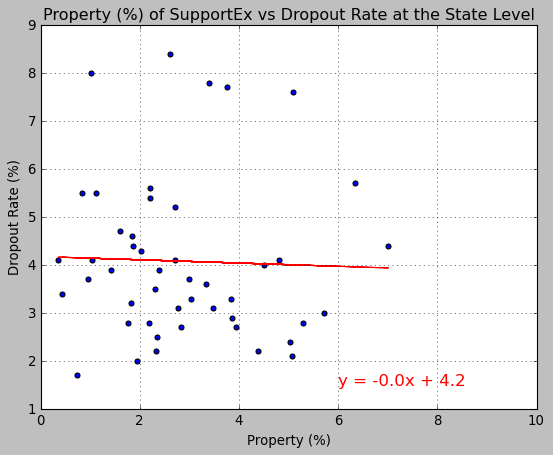

The correlation between both factors is -0.0324


In [50]:
# Property (%) vs Dropout Rate
x_values = summary_pct['Property (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,1.5),fontsize=15,color="red")
plt.xlabel('Property (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Property (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 10)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

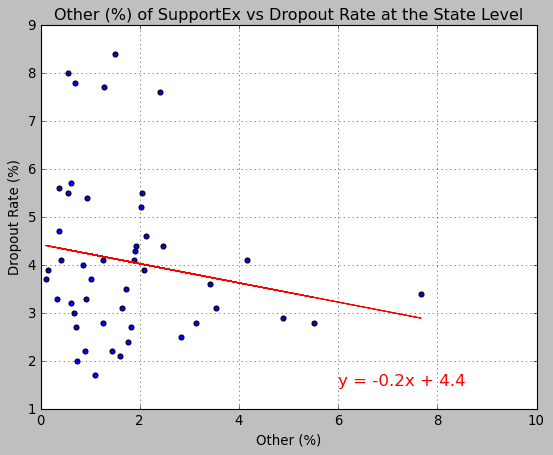

The correlation between both factors is -0.1784


In [51]:
# Property (%) vs Dropout Rate
x_values = summary_pct['Other (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,1.5),fontsize=15,color="red")
plt.xlabel('Other (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Other (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 10)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")